In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [35]:
df = pd.read_csv('Iris.csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,50,50,50,50,50
Iris-versicolor,50,50,50,50,50
Iris-virginica,50,50,50,50,50


In [10]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [17]:
scalar = StandardScaler()
df_scaled = scalar.fit_transform(df.copy(deep=True).iloc[:, :-1])

pd.DataFrame(df_scaled).describe()

,0,1,2,3,4
count,150.000000,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,0.000000,-4.736952e-16,-6.631732e-16,3.315866e-16,-2.842171e-16
std,1.003350,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.720542,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-0.860271,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,0.000000,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,0.860271,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,1.720542,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


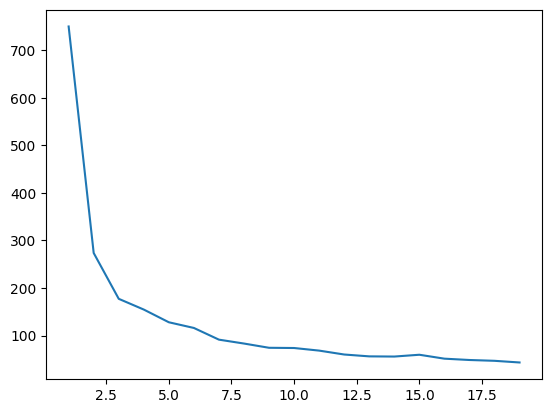

In [27]:
SSE = []

for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(df_scaled)
    SSE.append(kmeans.inertia_)

frame = pd.DataFrame({'Clusters': range(1, 20), 'SSE': SSE})
plt.plot(frame['Clusters'], frame['SSE'])

In [41]:
# using 3

kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(df_scaled)

predict = kmeans.predict(df_scaled)
frame = pd.DataFrame(df_scaled)

frame['cluster'] = predict
frame['cluster'].value_counts()

cluster
2    53
1    50
0    47
Name: count, dtype: int64